In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [2]:
ls

dataset/  dataset.zip  __MACOSX/  sample_data/


In [0]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25850 sha256=c298b31491936aa32beb973add1923f032545d69eecc91685acd32dd85e9649c
  Stored in directory: /Users/pradyumna/Library/Caches/pip/wheels/ff/8f/43/c2a588576c4ddd4de073599a72d4add981f75ed34ce618fb39
Successfully built imutils


In [0]:
from imutils import paths

In [0]:
import zipfile

In [0]:
import zipfile
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [0]:
dataset_path = './dataset'

In [0]:
lst = os.listdir(dataset_path)
if '.DS_Store' in lst:
    lst.remove('.DS_Store')

In [13]:
lst[1]

'normal'

In [0]:
data = []
labels = []

In [8]:
for i in lst:
    label = i.split(os.path.sep)[-2]

IndexError: ignored

In [86]:
ls

dataset/  dataset.zip  __MACOSX/  sample_data/


In [0]:
paths_list = list(paths.list_images('./dataset'))

In [84]:
paths_list

['./dataset/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 './dataset/covid/nejmoa2001191_f1-PA.jpeg',
 './dataset/covid/ryct.2020200034.fig2.jpeg',
 './dataset/covid/nejmoa2001191_f5-PA.jpeg',
 './dataset/covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 './dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg',
 './dataset/covid/ryct.2020200028.fig1a.jpeg',
 './dataset/covid/nejmoa2001191_f3-PA.jpeg',
 './dataset/covid/lancet-case2a.jpg',
 './dataset/covid/nCoV-radiol.2020200269.fig1-day7.jpeg',
 './dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg',
 './dataset/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 './dataset/covid/radiol.2020200490.fig3.jpeg',
 './dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg',
 './dataset/covid/radiopedia-covid-19-pneumonia-2.jpg',
 './dataset/covid/nejmc2001573_f1a.jpeg',
 './dataset/covid/nejmc2001573_f1b.jpeg',
 './dataset/covid/ryct.2020200034.fig5

In [0]:
i = './dataset/normal/NORMAL2-IM-0315-0001.jpeg'

In [0]:
label = i.split(os.path.sep)[-2]

In [18]:
i.split('/')

['.', 'dataset', 'normal', 'NORMAL2-IM-0315-0001.jpeg']

In [19]:
label

'normal'

In [0]:
for i in paths_list:
    
    
    label = i.split('/')[-2]
    
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    
    data.append(image)
    
    labels.append(label)    

In [22]:
len(data)

50

In [86]:
labels

['covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'covid',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal']

In [0]:
data = np.array(data)/255.0
labels = np.array(labels)

In [0]:

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [0]:
mygen = ImageDataGenerator(rotation_range=15,
                           fill_mode="nearest",
                          )

In [40]:
mygen

In [0]:
base = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


In [91]:
base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
from tensorflow.keras.layers import MaxPooling2D

In [0]:
top = base.output
top = AveragePooling2D(pool_size=(4, 4))(top)


In [0]:
model = Model(inputs=base.input, outputs=top)

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
top = Flatten(name="flatten")(top)
top = Dense(64, activation="relu")(top)
top = Dropout(0.5)(top)
top = Dense(2, activation="softmax")(top)

In [0]:
model = Model(inputs = base.input, outputs=top)

In [96]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [44]:
base.layers

In [0]:
for i in base.layers:
    i.trainable = False

In [140]:
base.layers[1].trainable

False

In [0]:
int_lr = 1e-3
epoch = 25
bs= 8

In [0]:
adm = Adam(lr=int_lr, decay=int_lr / epoch)

In [100]:
adm

In [0]:
model.compile(loss="binary_crossentropy", optimizer=adm,metrics=["accuracy"])

In [0]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [103]:
fit_model = model.fit_generator(mygen.flow(trainX, trainY, batch_size=bs),
                        steps_per_epoch=len(trainX) // bs,
                        validation_data=(testX, testY),
                        validation_steps=len(testX) // bs,
                        epochs=epoch)

Epoch 1/25
5/5 [==============================] - 1s 113ms/step - loss: 0.9290 - accuracy: 0.4750 - val_loss: 0.7778 - val_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 0s 86ms/step - loss: 0.7985 - accuracy: 0.5000 - val_loss: 0.7117 - val_accuracy: 0.4000
Epoch 3/25
5/5 [==============================] - 0s 83ms/step - loss: 0.8478 - accuracy: 0.4500 - val_loss: 0.7016 - val_accuracy: 0.5000
Epoch 4/25
5/5 [==============================] - 0s 80ms/step - loss: 0.7728 - accuracy: 0.5250 - val_loss: 0.6686 - val_accuracy: 0.6000
Epoch 5/25
5/5 [==============================] - 0s 79ms/step - loss: 0.7323 - accuracy: 0.5250 - val_loss: 0.6404 - val_accuracy: 0.7000
Epoch 6/25
5/5 [==============================] - 0s 85ms/step - loss: 0.6462 - accuracy: 0.6750 - val_loss: 0.6185 - val_accuracy: 0.9000
Epoch 7/25
5/5 [==============================] - 0s 81ms/step - loss: 0.6498 - accuracy: 0.6250 - val_loss: 0.5990 - val_accuracy: 0.9000
Epoch 8/25
5/5 [==========

In [0]:
predIdxs = model.predict(testX, batch_size=bs)

In [105]:
type(predIdxs)

numpy.ndarray

In [106]:
len(predIdxs)

10

In [107]:
predIdxs[1]

array([0.22300135, 0.77699864], dtype=float32)

In [108]:
np.argmax(predIdxs[1])

1

In [109]:
predIdxs.shape

(10, 2)

In [0]:
predId = np.argmax(predIdxs, axis=1)

In [111]:
predId

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [112]:
print(classification_report(testY.argmax(axis=1), predId,
	target_names=lb.classes_))

              precision    recall  f1-score   support

       covid       1.00      0.80      0.89         5
      normal       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [0]:
c_m = confusion_matrix(testY.argmax(axis=1), predId)


In [115]:
c_m

array([[4, 1],
       [0, 5]])

In [116]:
total = sum(sum(c_m))
acc = (c_m[0, 0] + c_m[1, 1]) / total
sensitivity = c_m[0, 0] / (c_m[0, 0] + c_m[0, 1])
specificity = c_m[1, 1] / (c_m[1, 0] + c_m[1, 1])
print(c_m)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[4 1]
 [0 5]]
acc: 0.9000
sensitivity: 0.8000
specificity: 1.0000


In [117]:
epoch

25

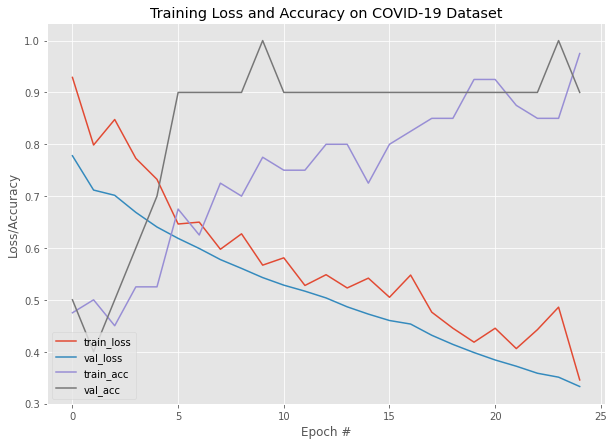

In [126]:
N = epoch
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=10,7
plt.figure()
plt.plot(np.arange(0, N), fit_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), fit_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), fit_model.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), fit_model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("figure")


In [0]:
model.save('covid19.h5')